<a href="https://colab.research.google.com/github/tomasiamcm/DA_SegurancaPublicaBrasil/blob/main/SegurancaPublica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
# plt.style.use("seaborn")

In [2]:
# Upload do arquivo
from google.colab import files
arq = files.upload()

Saving isp_uf.xlsx to isp_uf.xlsx


In [23]:
# Criando DataFrame - UF
df = pd.read_excel("isp_uf.xlsx")

In [24]:
# Verificando tamanho da base
df.shape

(21400, 5)

In [25]:
# Verificando as 2 primeiras linhas
df.head(2)

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2022,janeiro,31
1,Acre,Furto de veículo,2022,janeiro,50


In [26]:
# Verificando valores nulos da base
df.isnull().sum()

UF             0
Tipo Crime     0
Ano            0
Mês            0
Ocorrências    0
dtype: int64

In [27]:
# Convertendo Ano de int64 para object
df["Ano"] = df["Ano"].astype(object)

In [28]:
# Total de Ocorrências
df["Ocorrências"].sum()

4397471

In [29]:
# Verificando informações estatisticas
df.describe()

,Ocorrências
count,21400.000000
mean,205.489299
std,675.548041
min,0.000000
25%,3.000000
50%,34.000000
75%,169.000000
max,10518.000000


In [30]:
# Verificando a tipagem dos dados
df.dtypes

UF             object
Tipo Crime     object
Ano            object
Mês            object
Ocorrências     int64
dtype: object

In [31]:
# Total de Ocorrências por Tipo de Crime x UF
total_tp_crime = df[["Tipo Crime", "UF", "Ocorrências"]].groupby(["Tipo Crime", "UF"]).sum()
display(total_tp_crime)

Ocorrências
Tipo Crime             UF                         
Estupro                Acre                   1689
                       Alagoas                4361
                       Amapá                  2491
                       Amazonas               6238
                       Bahia                 22417
...                                            ...
Tentativa de homicídio Roraima                1050
                       Santa Catarina        10758
                       Sergipe                4011
                       São Paulo             27122
                       Tocantins              2929

[243 rows x 1 columns]

In [32]:
# Calcular total por UF
df_total_uf = df.groupby("UF")["Ocorrências"].sum().sort_values(ascending=True)
display(df_total_uf)

UF
Acre                     12978
Amapá                    13188
Roraima                  13451
Tocantins                27216
Paraíba                  33524
Sergipe                  38907
Rondônia                 47455
Alagoas                  47948
Mato Grosso do Sul       52769
Amazonas                 55589
Piauí                    60642
Mato Grosso              64107
Rio Grande do Norte      64271
Maranhão                 79162
Distrito Federal         80628
Espírito Santo           94782
Santa Catarina          120682
Pará                    122462
Ceará                   147909
Goiás                   162166
Pernambuco              207524
Bahia                   218319
Paraná                  239334
Rio Grande do Sul       276810
Minas Gerais            290302
Rio de Janeiro          530195
São Paulo              1295151
Name: Ocorrências, dtype: int64

In [35]:
# Calcular total por UF
df_total_crime = df.groupby("Tipo Crime")["Ocorrências"].sum().sort_values(ascending=True)
display(df_total_crime)

Tipo Crime
Roubo a instituição financeira            5150
Lesão corporal seguida de morte           5704
Roubo seguido de morte (latrocínio)      13572
Roubo de carga                          140002
Tentativa de homicídio                  270783
Homicídio doloso                        332697
Estupro                                 368924
Roubo de veículo                       1544577
Furto de veículo                       1716062
Name: Ocorrências, dtype: int64

In [34]:
# Calcular total Crimes por Ano
df_total_ano = df.groupby("Ano")["Ocorrências"].sum().sort_values(ascending=True)
display(df_total_ano)

Ano
2022    192259
2020    450254
2021    457240
2019    550837
2018    647390
2015    665986
2017    713944
2016    719561
Name: Ocorrências, dtype: int64

In [36]:
# Calcular Total por UF e Ano
df.groupby([df["UF"], "Ano"])["Ocorrências"].sum()

UF         Ano 
Acre       2015     260
           2016     487
           2017    1796
           2018    2550
           2019    2598
                   ... 
Tocantins  2018    4720
           2019    3836
           2020    3646
           2021    3137
           2022    1241
Name: Ocorrências, Length: 216, dtype: int64

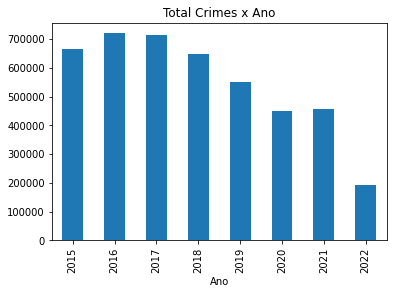

In [37]:
df.groupby("Ano")["Ocorrências"].sum().plot.bar(title="Total Crimes x Ano")
plt.xlabel = ("Ano")
plt.ylabel = ("Ocorrências");
# plt.xticks(rotation = 'horizontal');

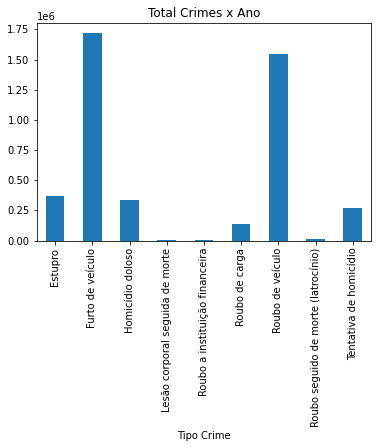

In [47]:
df.groupby("Tipo Crime")["Ocorrências"].sum().plot.bar(title="Total Crimes")
plt.xlabel = ("Tipo Crime")
plt.ylabel = ("Ocorrências");
# plt.xticks(rotation = 'horizontal');